# 머신러닝

### (1) 데이터를 탐색하고 탐색 결과를 제시하시오.

In [131]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('./data1/hotel_bookings.csv')
df

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.0,0,0,0,0,62.00
19996,1,Non Refund,101.0,0,3,0.0,0,0,0,0,130.00
19997,1,Non Refund,277.0,1,2,0.0,0,0,0,0,100.00
19998,1,No Deposit,0.0,0,1,0.0,0,0,0,0,209.00


In [132]:
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [134]:
df.deposit_type.value_counts()

No Deposit    19138
Non Refund      834
Refundable       28
Name: deposit_type, dtype: int64

In [135]:
df.groupby('deposit_type').agg({'adr':np.mean})

,adr
deposit_type,
No Deposit,101.965190
Non Refund,89.689476
Refundable,67.456154


1. 데이터 존재여부
- 결측치 탐색 결과, 결측치가 있는 변수는 3개이며 모두 실수형 변수이다. 총 결측치 갯수는 1426개이다. 결측치가 존재하는 변수들은 비율과 분포에 따라 각각 다른 방식으로 대체 할 수 있을 것으로 보인다.

2. 데이터 타입 설명
- 종속 변수는 int형, 독립변수는 float, object, int 형태로 구성돼 있다. object 타입은 인코딩을 통해 변환해줄 필요가 있다.


### (2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

In [136]:
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [137]:
df['is_repeated_guest'].value_counts()

0.0    18893
1.0      749
Name: is_repeated_guest, dtype: int64

In [138]:
print('lead time 결측치 비율: {}%'.format(round(5/len(df)*100,2)))
print('is_repeated_guest 결측치 비율: {}%'.format(round(358/len(df)*100,2)))
print('adr 결측치 비율: {}%'.format(round(1063/len(df)*100,2)))

lead time 결측치 비율: 0.03%
is_repeated_guest 결측치 비율: 1.79%
adr 결측치 비율: 5.32%


답: 결측치가 있는 변수는 lead_time, is_repeated_guest, adr이다. lead_time 변수는 결측치가 1% 미만이므로 삭제를 진행한다. is_repeated_guest 변수는 최빈값으로 대체하고, adr 변수는 deposit_type 별 평균 adr로 대체한다.

In [139]:
df.groupby('deposit_type').agg({'adr':np.mean})

,adr
deposit_type,
No Deposit,101.965190
Non Refund,89.689476
Refundable,67.456154


In [140]:
# lead_time 결측치 삭제
df1 = df.dropna(axis=0, subset='lead_time')

# is_repeated_guest 변수는 이진형 변수이기 때문에 최빈값으로 대체
df1['is_repeated_guest'] = df1['is_repeated_guest'].fillna(0)

# adr 변수 deposit_type 별 평균 adr로 대체

df1= df1.groupby('deposit_type').apply(lambda x: x.fillna(x.mean()))
df1 = df1.reset_index().drop(columns='index')

df1.isna().sum()

is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19995 entries, 0 to 19994
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     19995 non-null  int64  
 1   deposit_type                    19995 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         19995 non-null  int64  
 4   stays_in_week_nights            19995 non-null  int64  
 5   is_repeated_guest               19995 non-null  float64
 6   previous_cancellations          19995 non-null  int64  
 7   previous_bookings_not_canceled  19995 non-null  int64  
 8   booking_changes                 19995 non-null  int64  
 9   days_in_waiting_list            19995 non-null  int64  
 10  adr                             19995 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


### (3) 데이터 질을 향상시킬 수 있는 방법을 제안하시오.

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

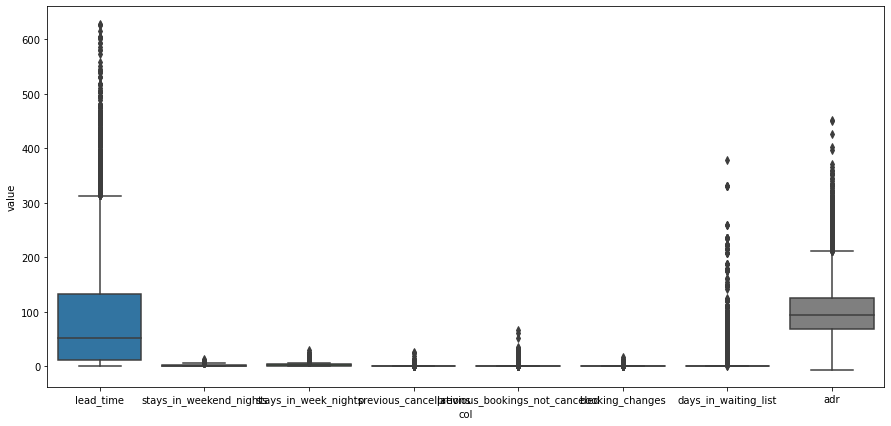

In [143]:
df_test= pd.melt(df.drop(columns=['is_canceled','deposit_type', 'is_repeated_guest']), var_name='col',value_name='value')


plt.figure(figsize=(15,7))
sns.boxplot(x='col',y='value',data=df_test)
plt.xticks(range(8),df.drop(columns=['is_canceled','deposit_type', 'is_repeated_guest']).columns)
plt.show()

답: IQR방식으로 실수형 변수들의 이상치를 보정해주는 방식으로 데이터의 질을 향상시킬 수 있다.

### (4) 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성하시오.

In [144]:
df1['is_canceled'].value_counts().values

array([17595,  2400], dtype=int64)

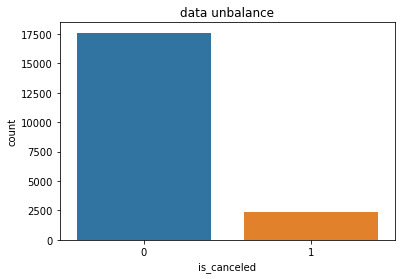

0의 비율: 88.0%
1의 비율: 12.0%


In [145]:
sns.countplot(x='is_canceled', data =df1)
plt.title('data unbalance')
plt.show()

print('0의 비율: {}%'.format(round(17595/len(df1)*100,2)))
print('1의 비율: {}%'.format(round(2400/len(df1)*100,2)))

답: 종속변수인 is_canceled 변수는 0의 비율이 88%, 1의 비율이 12%로 0의 관측값 수 와 1의 관측값 수가 균등하지 않으므로 불균형 데이터이다.

### (5) 오버 샘플링 기법을 설명하고 비교한 뒤 2개 기법을 선정하고 근거를 제시하시오.

답: 오버 샘플링 기법은 비중이 작은 데이터를 추가로 생성해 데이터 불균형을 극복하는 방식이다. 소수 레이블을 가진 데이터세트를 다수 레이블을 가지 데이터세트의 수만큼 증식시켜 학습에 충분한 데이터를 확보하는 기법이다. 언더 샘플링 기법의 데이터의 손실을 일으키기 때문에 일반적으로 오버 샘플링 기법을 사용한다.

1. random oversampling
- 소수 레이블에 속하는 데이터의 관측치를 복사하는 방식으로 데이터를 증식시킨다.
- 데이터를 단순 복제하는 방식으로 기존의 데이터와 동일한 복제 데이터를 생성한다.
- 단순 복제로 인한 소수 클래스에 과적합이 발생한다는 단점이 있지만 사용이 용이하다는 장점이 있다.

2. SMOTE
- 소수 레이블에 속하는 개별 데이터들의 k-최근접 이웃을 찾아, 해당 데이터와 k개 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지진 새로운 데이터를 생성하는 방식이다.
- random oversampling 기법보다 속도가 느리다는 단점이 있지만 데이터를 단순히 복제하는 것이 아니기 때문에 과적합 문제를 예방할 수 있다는 장점이 있다.

### (6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.

random oversampling, SMOTE
- 이유: random oversampling 방식은 간단한 방식으로 데이터 불균형을 해결할 수 있다는 장점으로  선택했고, SMOTE 방식은 과적합 문제를 방지할 수 있다는 점에서 선택했다.

In [146]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

df1 = pd.get_dummies(df1, columns=['deposit_type'])

X = df1.drop(['is_canceled'], axis = 1)
y = df1['is_canceled']

# RandomOver sampling
ros = RandomOverSampler(random_state=1)
X_ro, y_ro = ros.fit_resample(X,y)
print('기존의 타깃 분포')
print(df1['is_canceled'].value_counts()/len(df1))
print('RandomOver sampling후  타깃 분포')
print(y_ro.value_counts()/len(y_ro))

기존의 타깃 분포
0    0.87997
1    0.12003
Name: is_canceled, dtype: float64
RandomOver sampling후  타깃 분포
0    0.5
1    0.5
Name: is_canceled, dtype: float64


In [168]:
# SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X,y)
print('기존의 타깃 분포')
print(df1['is_canceled'].value_counts()/len(df1))
print('RandomOver sampling후  타깃 분포')
print(y_sm.value_counts()/len(y_sm))

기존의 타깃 분포
0    0.87997
1    0.12003
Name: is_canceled, dtype: float64
RandomOver sampling후  타깃 분포
0    0.5
1    0.5
Name: is_canceled, dtype: float64


### (7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면 모델 하나를 선정하고, 그 이유를 설명하시오.

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

start = time.time()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=100)
clf =RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100)
clf.fit(X_train,y_train)
print('train 정확도: ',clf.score(X_train,y_train))
pred=  clf.predict(X_test)
print('정확도: ', accuracy_score(pred,y_test))
print('시간:, ', time.time()-start)


train 정확도:  0.9332333083270817
정확도:  0.9312328082020506
시간:,  1.6835393905639648


In [170]:
start = time.time()
X_ro_train, X_ro_test, y_ro_train, y_ro_test = train_test_split(X_ro,y_ro, test_size=0.2,stratify=y_ro, random_state=100)
clf_ro =RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100)
clf_ro.fit(X_ro_train,y_ro_train)
print('train 정확도: ',clf_ro.score(X_ro_train,y_ro_train))
pred=  clf_ro.predict(X_ro_test)
print('정확도: ', accuracy_score(pred,y_ro_test))
print('시간:, ', time.time()-start)

train 정확도:  0.9852585961921
정확도:  0.9518329070758739
시간:,  2.689539670944214


In [171]:
start = time.time()
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm,y_sm, test_size=0.2,stratify=y_sm, random_state=100)
clf_sm =RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100)
clf_sm.fit(X_sm_train,y_sm_train)
print('train 정확도: ',clf_sm.score(X_sm_train,y_sm_train))
pred=  clf_sm.predict(X_sm_test)
print('정확도: ', accuracy_score(pred,y_sm_test))
print('시간:, ', time.time()-start)

train 정확도:  0.9636970730321114
정확도:  0.8922989485649332
시간:,  3.3536932468414307


### (8) 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로, 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.

# 통계분석

1. 공장에서는 시제품의 농도(%)가 60이라고 주장하며 품질관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하시오.

(1) 연구가설, 귀무가설을 작성하시오.
- 귀무가설: 시제품의 농도는 60%이다.
- 연구가설: 시제품의 농도는 60%가 아니다.

(2) 유효한 샘플의 수를 계산하시오.
- 유효한 샘플의 수는 최소 표본크기를 계산하여 설정할 수 있다. 
- 최소 표본크기의 계산은 허용오차식을 바탕으로 한다.
- 혀횽할 수 있는 오차한계와 신뢰수준이 주어졌을 때, 샘플로부터 추정한 표준편차를 사용해 표본의 크기를 구한다.
- 오차한계를 5, 신뢰수준을 0.05로 설정한 뒤 샘플의 표준편차를 구한다.

In [1]:
x = [52,50,62, 75, 26, 45, 63, 35, 57, 14]
import numpy as np
moe = 0.5 # 오차한계
a = 0.05 # 신뢰수준
std = np.std(x)
print(std)

17.518276170902205


In [2]:
from scipy import stats
(stats.t.ppf(q=0.05, df=9)*std/5)**2
# 유효한 샘플의 수는 40이상이다.

41.24973579972044

In [6]:
import pandas as pd
stats.wilcoxon(pd.Series(x)-60, alternative='two-sided')
# 검정결과 p-value가 0.05보다 크므로 귀무가설을 기각할 수 없다.
# 즉, 시제품의 농도는 60이다.

WilcoxonResult(statistic=10.0, pvalue=0.083984375)

#### 2. 코로나 시계열 데이터로 다음을 수행하시오.
#### (1). ACF 사용해서 distancd를 계산하시오.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data1/서울특별시 코로나19.csv')
df.head()

,날짜,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2022-03-30,37261,33753,55376,81018,96008,95433,103288,116862,75118,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,2022-03-29,36216,32835,53872,79030,93474,92993,100255,113609,72934,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,2022-03-28,35276,31878,52391,76802,91030,90277,97419,110583,70754,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,2022-03-27,34879,31577,51652,76108,89876,89302,96359,109500,70003,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,2022-03-26,34061,30903,50720,74178,87770,87345,93690,106437,68329,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      785 non-null    object
 1   종로구     785 non-null    int64 
 2   중구      785 non-null    int64 
 3   용산구     785 non-null    int64 
 4   성동구     785 non-null    int64 
 5   광진구     785 non-null    int64 
 6   동대문구    785 non-null    int64 
 7   중랑구     785 non-null    int64 
 8   성북구     785 non-null    int64 
 9   강북구     785 non-null    int64 
 10  도봉구     785 non-null    int64 
 11  노원구     785 non-null    int64 
 12  은평구     785 non-null    int64 
 13  서대문구    785 non-null    int64 
 14  마포구     785 non-null    int64 
 15  양천구     785 non-null    int64 
 16  강서구     785 non-null    int64 
 17  구로구     785 non-null    int64 
 18  금천구     785 non-null    int64 
 19  영등포구    785 non-null    int64 
 20  동작구     785 non-null    int64 
 21  관악구     785 non-null    int64 
 22  서초구     785 non-null    in

In [3]:
df1 = df[df.columns.difference(['날짜'])]
df1

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,136200,121926,75118,148359,132305,96008,109973,63687,135361,82254,...,81018,116862,176765,115771,110293,55376,119150,37261,33753,103288
1,132333,118842,72934,143573,127626,93474,106162,61840,130878,79677,...,79030,113609,172292,111900,106171,53872,115116,36216,32835,100255
2,128813,115846,70754,139633,124805,91030,103573,59946,127299,77878,...,76802,110583,167386,109290,104109,52391,112560,35276,31878,97419
3,126296,113549,70003,137908,123374,89876,102610,59393,125120,76542,...,76108,109500,165373,107582,102916,51652,110620,34879,31577,96359
4,123992,110649,68329,134285,120413,87770,99938,57925,121314,75119,...,74178,106437,161650,104991,100349,50720,108254,34061,30903,93690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,0,0,0,1,0,0,0,0,0,0,...,0,2,1,0,0,0,0,3,0,1


In [6]:
df1.transpose()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
강남구,136200,132333,128813,126296,123992,117573,116637,112922,107360,104101,...,0,0,0,0,0,0,0,0,0,0
강동구,121926,118842,115846,113549,110649,106653,104266,100582,95772,93683,...,0,0,0,0,0,0,0,0,0,0
강북구,75118,72934,70754,70003,68329,68116,64872,62635,60062,57799,...,0,0,0,0,0,0,0,0,0,0
강서구,148359,143573,139633,137908,134285,128701,126806,122706,117420,113387,...,0,0,0,0,0,0,0,0,1,1
관악구,132305,127626,124805,123374,120413,115209,113972,110587,105402,102490,...,0,0,0,0,0,0,0,0,0,0
광진구,96008,93474,91030,89876,87770,86488,83280,80149,76850,75116,...,0,0,0,0,0,0,0,0,0,0
구로구,109973,106162,103573,102610,99938,97546,94520,91314,86948,84260,...,0,0,0,0,0,0,0,0,0,0
금천구,63687,61840,59946,59393,57925,58920,54772,52908,50713,48710,...,0,0,0,0,0,0,0,0,0,0
노원구,135361,130878,127299,125120,121314,117632,115419,111567,106013,102860,...,0,0,0,0,0,0,0,0,0,0
도봉구,82254,79677,77878,76542,75119,73167,71160,68818,65823,63636,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.shape[1]

26

In [17]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
def acf(x, n_lags):
    return sm.tsa.stattools.acf(x, nlags=n_lags)

n_lags = 785
lag_arr = np.repeat(n_lags,df1.shape[1])
acf_list = list(map(acf,df1.transpose().to_numpy(),lag_arr))
acf_df = pd.DataFrame(acf_list).transpose()
acf_df.columns = df1.columns

acf_df

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965594,0.964788,0.964873,0.963102,0.964599,0.965118,0.964896,0.964495,0.962739,0.964677,...,0.964843,0.964386,0.965216,0.963406,0.964211,0.965807,0.963757,0.965624,0.966025,0.964429
2,0.931913,0.930000,0.930425,0.927079,0.930349,0.930705,0.930870,0.929726,0.926474,0.930168,...,0.930035,0.929349,0.930854,0.927777,0.929708,0.932148,0.928512,0.932172,0.932933,0.929547
3,0.898790,0.895648,0.896665,0.891603,0.896316,0.896734,0.897198,0.895662,0.890730,0.895849,...,0.895739,0.894822,0.897147,0.892371,0.895164,0.899075,0.893408,0.899077,0.900435,0.895251
4,0.865697,0.861294,0.862291,0.855502,0.861660,0.862274,0.862796,0.860914,0.854712,0.861332,...,0.860691,0.859554,0.862857,0.856622,0.860051,0.865682,0.858069,0.865542,0.867391,0.860302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,-0.016955,-0.015228,-0.015857,-0.015340,-0.016273,-0.015231,-0.016170,-0.015477,-0.015416,-0.015638,...,-0.015171,-0.015739,-0.015392,-0.015053,-0.016447,-0.017232,-0.015876,-0.017175,-0.017212,-0.016019
781,-0.013717,-0.012334,-0.012831,-0.012420,-0.013163,-0.012320,-0.013083,-0.012523,-0.012501,-0.012644,...,-0.012270,-0.012738,-0.012449,-0.012183,-0.013303,-0.013929,-0.012845,-0.013889,-0.013915,-0.012970
782,-0.010415,-0.009360,-0.009726,-0.009417,-0.009972,-0.009335,-0.009909,-0.009490,-0.009491,-0.009589,...,-0.009290,-0.009646,-0.009434,-0.009239,-0.010075,-0.010562,-0.009744,-0.010519,-0.010542,-0.009829
783,-0.007044,-0.006323,-0.006586,-0.006374,-0.006742,-0.006309,-0.006704,-0.006427,-0.006425,-0.006479,...,-0.006282,-0.006522,-0.006380,-0.006246,-0.006808,-0.007144,-0.006586,-0.007108,-0.007135,-0.006652


#### (2) 계층적 군집분석을 위한 덴드로그램을 작성하시오.

In [21]:
acf_df = acf_df.T
acf_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
강남구,1.0,0.965594,0.931913,0.898790,0.865697,0.832537,0.801510,0.769774,0.738757,0.709541,...,-0.031448,-0.028760,-0.025982,-0.023050,-0.020016,-0.016955,-0.013717,-0.010415,-0.007044,-0.003576
강동구,1.0,0.964788,0.930000,0.895648,0.861294,0.827337,0.794486,0.761769,0.729945,0.699790,...,-0.028260,-0.025833,-0.023348,-0.020731,-0.018012,-0.015228,-0.012334,-0.009360,-0.006323,-0.003204
강북구,1.0,0.964873,0.930425,0.896665,0.862291,0.828221,0.792955,0.759475,0.726817,0.695380,...,-0.029677,-0.027141,-0.024501,-0.021740,-0.018874,-0.015857,-0.012831,-0.009726,-0.006586,-0.003344
강서구,1.0,0.963102,0.927079,0.891603,0.855502,0.819774,0.785463,0.750681,0.716584,0.683842,...,-0.028518,-0.026075,-0.023540,-0.020883,-0.018134,-0.015340,-0.012420,-0.009417,-0.006374,-0.003242
관악구,1.0,0.964599,0.930349,0.896316,0.861660,0.827261,0.794470,0.761023,0.728057,0.696761,...,-0.030343,-0.027721,-0.025020,-0.022177,-0.019242,-0.016273,-0.013163,-0.009972,-0.006742,-0.003435
광진구,1.0,0.965118,0.930705,0.896734,0.862274,0.828063,0.793461,0.759914,0.727410,0.696133,...,-0.028500,-0.026029,-0.023499,-0.020853,-0.018098,-0.015231,-0.012320,-0.009335,-0.006309,-0.003199
구로구,1.0,0.964896,0.930870,0.897198,0.862796,0.828844,0.795141,0.762101,0.729844,0.699238,...,-0.030134,-0.027558,-0.024895,-0.022089,-0.019179,-0.016170,-0.013083,-0.009909,-0.006704,-0.003414
금천구,1.0,0.964495,0.929726,0.895662,0.860914,0.826576,0.789627,0.756024,0.723216,0.691591,...,-0.028980,-0.026521,-0.023954,-0.021269,-0.018484,-0.015477,-0.012523,-0.009490,-0.006427,-0.003263
노원구,1.0,0.962739,0.926474,0.890730,0.854712,0.819369,0.784696,0.749856,0.715791,0.683554,...,-0.028649,-0.026200,-0.023672,-0.021003,-0.018237,-0.015416,-0.012501,-0.009491,-0.006425,-0.003269
도봉구,1.0,0.964677,0.930168,0.895849,0.861332,0.826712,0.792456,0.758619,0.725532,0.693844,...,-0.029226,-0.026713,-0.024109,-0.021379,-0.018550,-0.015638,-0.012644,-0.009589,-0.006479,-0.003294


#### 3. 사회과학, 자연과학, 공학 세 개 학과의 평점조사표를 보고 학과와 성적이 관계있는지 검정하시오.

In [32]:
사회 = [16,30,12]
자연 = [12,20,3]
공학 = [18,13,14]
평점 = ['3.5~4,5','2.5~3.5','1.5~2.5']

df = pd.DataFrame({'사회과학': 사회, '자연과학':자연, '공학':공학}, index=평점)
df

,사회과학,자연과학,공학
"3.5~4,5",16,12,18
2.5~3.5,30,20,13
1.5~2.5,12,3,14


#### (1) 연구가설과, 귀무가설을 작성하시오.
- 귀무가설: 성적과 학과 간에는 관련성이 없다.
- 연구가설: 성적과 학과 간에는 관령성이 있다.

#### (2) 학과와 성적이 독립일 때 기댓값을 구하시오.

In [36]:
from scipy import stats
test = stats.chi2_contingency(observed=df)

In [38]:
test[3]

array([[19.33333333, 11.66666667, 15.        ],
       [26.47826087, 15.97826087, 20.54347826],
       [12.1884058 ,  7.35507246,  9.45652174]])

In [39]:
test

(10.199441509990177,
 0.03719883770303157,
 4,
 array([[19.33333333, 11.66666667, 15.        ],
        [26.47826087, 15.97826087, 20.54347826],
        [12.1884058 ,  7.35507246,  9.45652174]]))

#### (3) 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.
- 검정통계량: 10.199
- p-value가 0.05 보다 작으므로 귀무가설을 기각한다. 즉, 성적과 학과 간에는 관련성이 있다.

In [2]:
from scipy import stats

In [4]:
stats.norm.ppf(.025)

-1.9599639845400545

In [ ]:
stats.t.ppf